`PyTorch` - это фреймворк машинного обучения ЯП Python с открытым исходным кодом, созданный на базе `Torch`. Как правило, используется для решения задач из области компьютерного зрения и обработки естественного языка.


Объект, который лежит в основе `PyTorch` - это тензор (`Tensor`). Данный объект очень похож на объект `np.ndarray` из `NumPy`. Основное отличие заключается в том, что тензоры `PyTorch` могут обрабатываться на видеокартах, что нередко позволяет сократить время на вычисления 😉



## Как установить PyTorch

Заходим по ссылке https://pytorch.org/ и жмем `install`

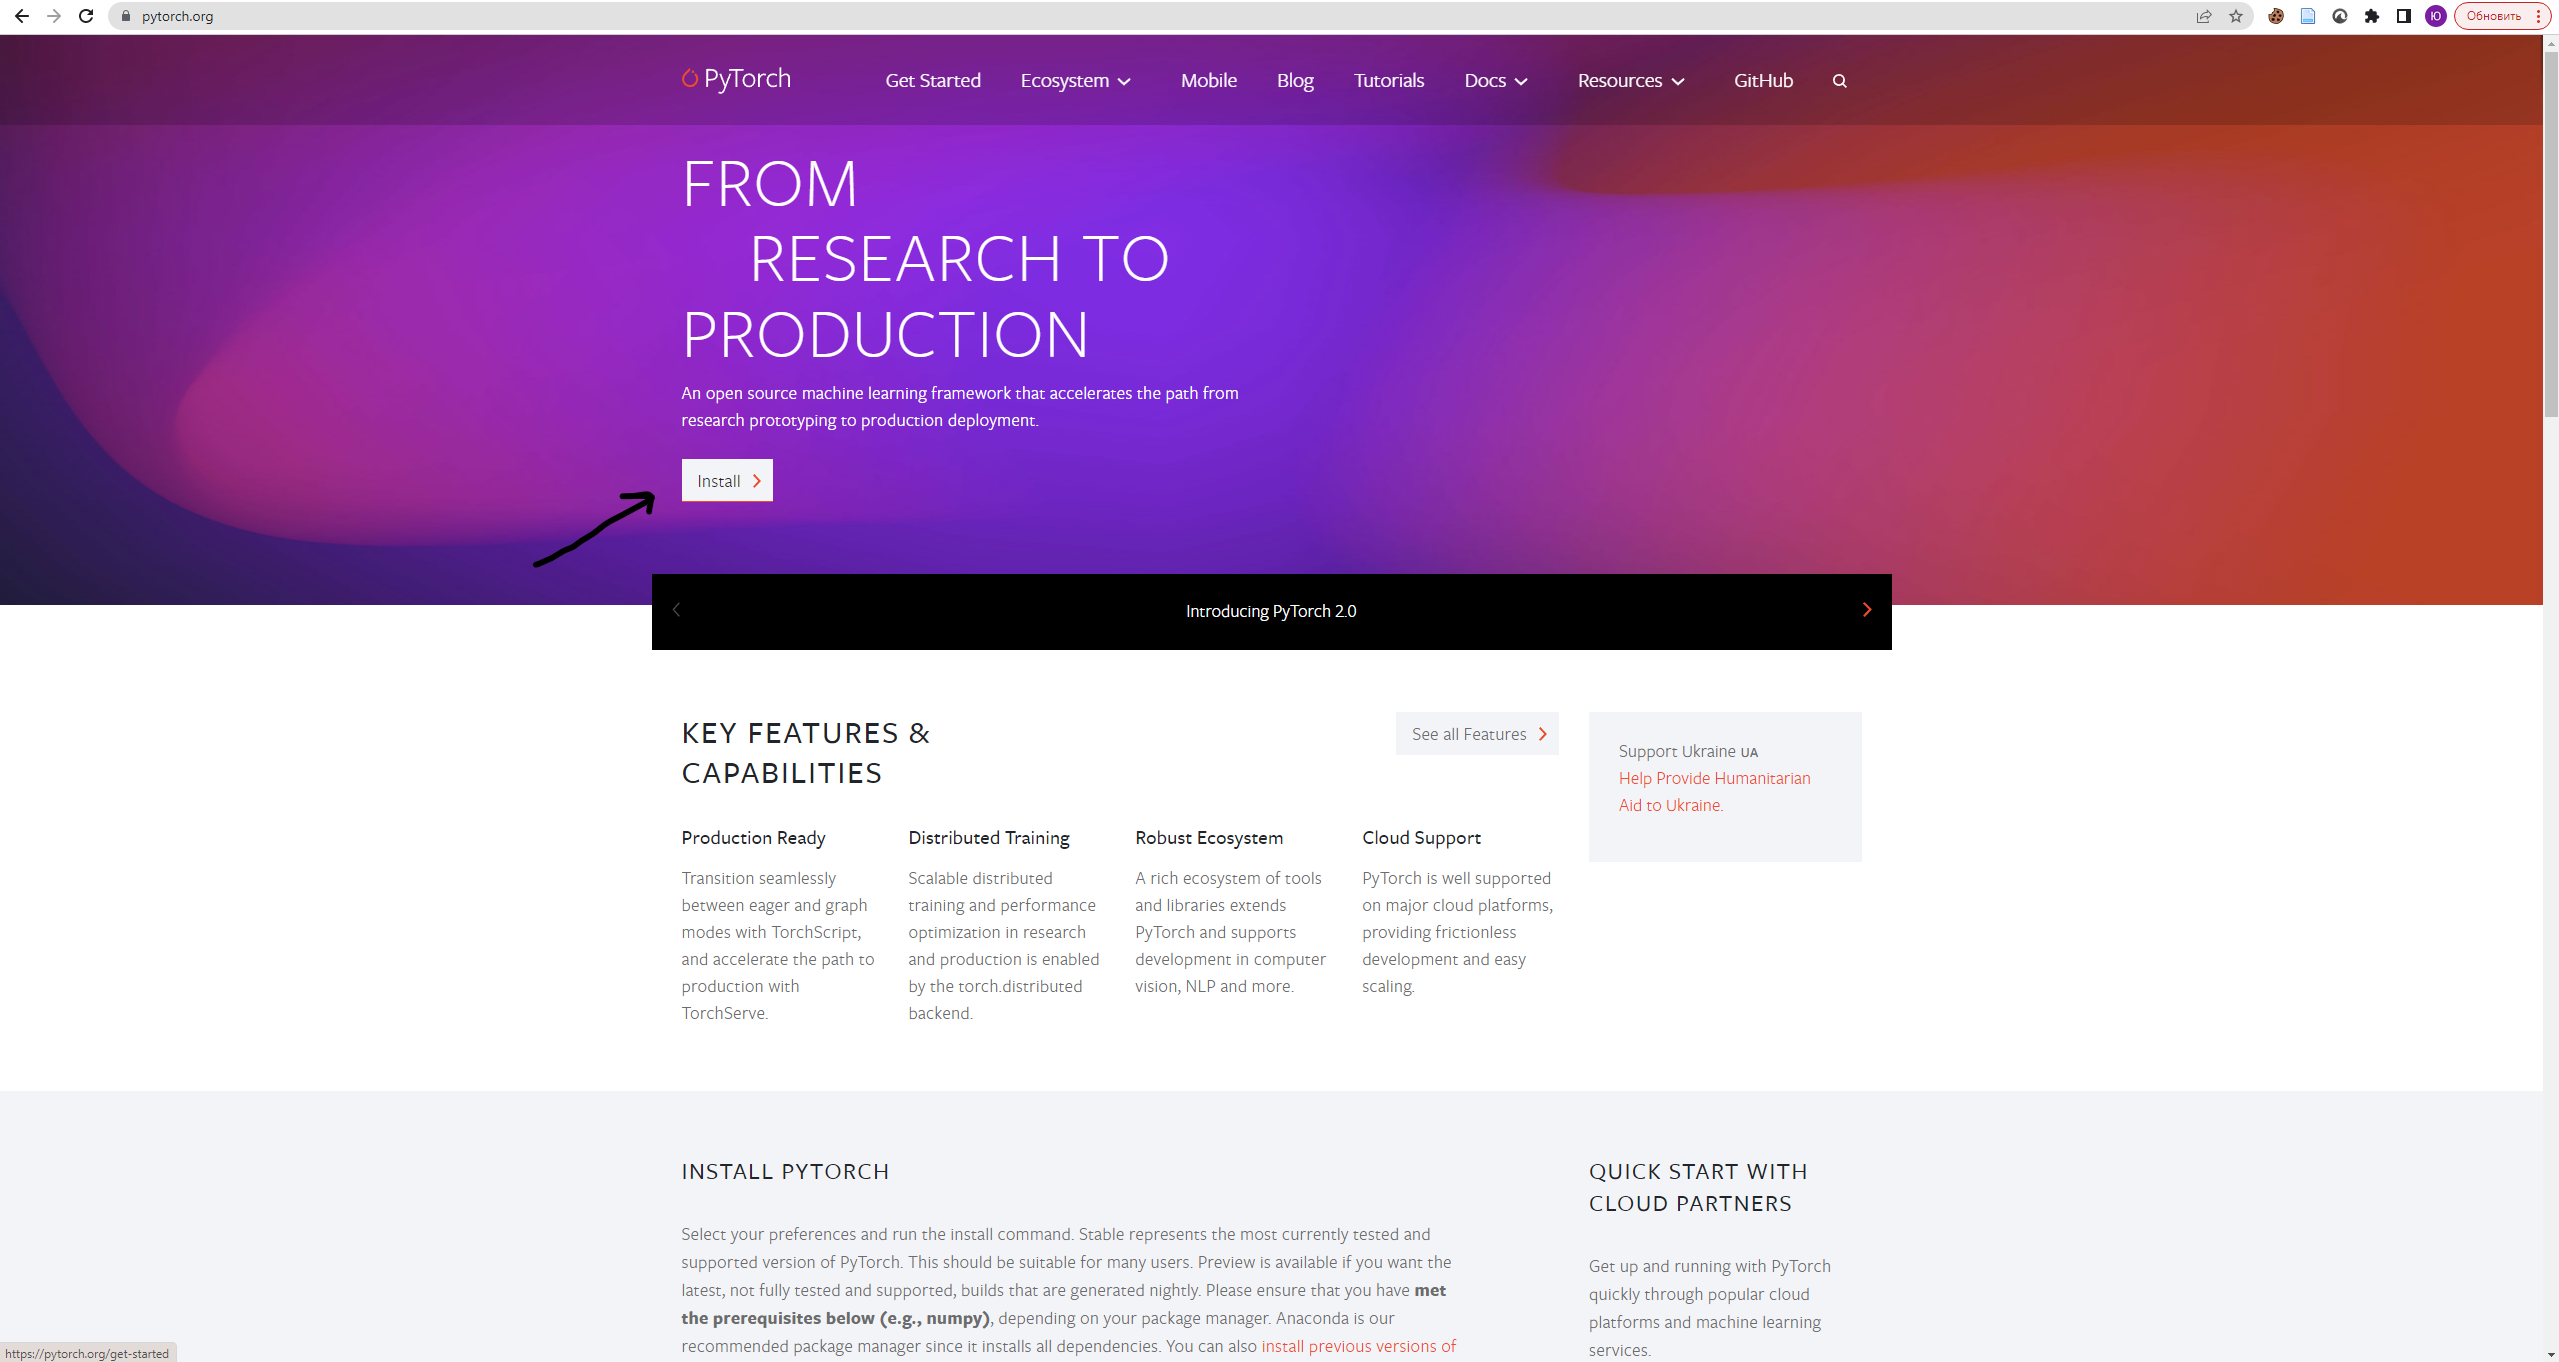

Выбираем нужную конфигурацию, копируем команду из поля `Run this Command` и вставляем в терминал с нужным окружением.

Обратите внимание, что установку можно выполнять как с помощью `pip`, так и с помощью `conda` (выбираете сами, как вам удобно).


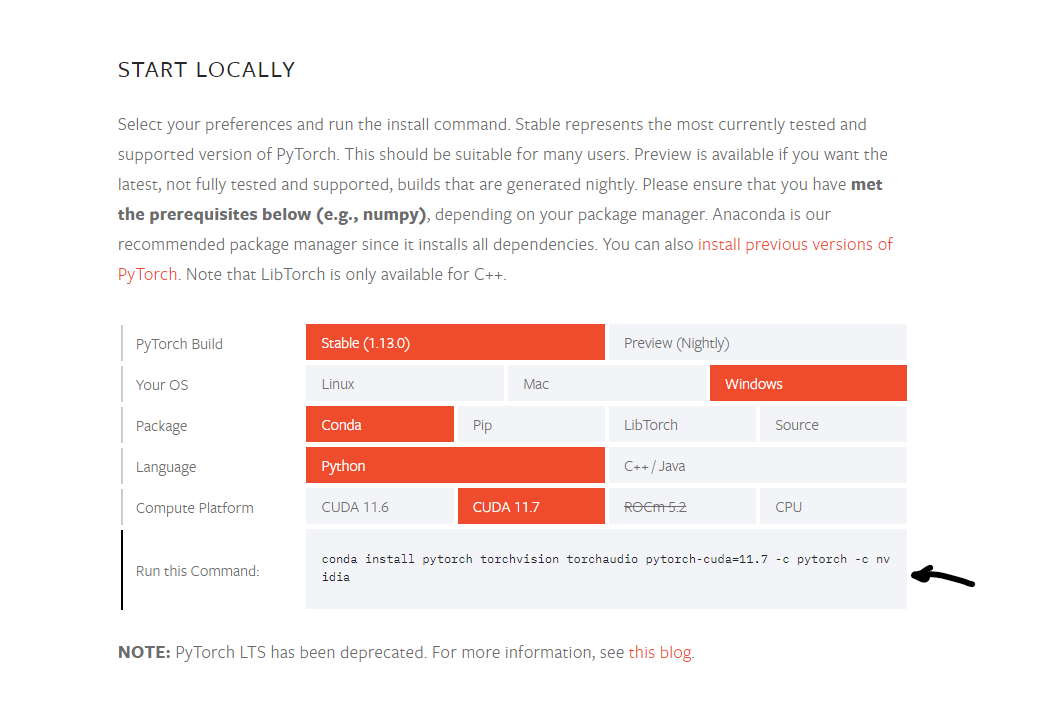

Псс... если будете программировать в `Google Colab`, то `PyTorch` устанавливать не придется 🥳

## Tensor 

Тензоры - это структура данных, которая очень похожа на массивы и матрицы. В `PyTorch` тензоры используются для того, чтобы закодировать входные и выходные данные модели, а также ее параметры.

Тензоры схожи с `np.ndarray` из `NumPy`, однако тензоры могут работать на видеокартах. На самом деле тензоры `PyTorch` и массивы `NumPy` часто совместно используют одну и ту же область памяти, что позволяет избавиться от необходимости копирования данных.

In [1]:
import torch
import numpy as np

### Инициализация тензора

#### Напрямую из данных

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

print(x_data, type(x_data))

tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>


#### Из NumPy массива

In [3]:
np_array = np.array(data)
x_numpy = torch.from_numpy(np_array)

print(x_numpy, type(x_numpy))

tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>


#### Из другого тензора

In [4]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [5]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.8092, 0.4969],
        [0.1910, 0.4858]]) 



#### Заполненный случаными или постоянными значениями

In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1337, 0.7163, 0.5152],
        [0.0060, 0.5543, 0.3144]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Задание типов с помощью `dtype`

Список возможных значений аргумента `dtype`:
- `torch.float32`: 32-битное значение с плавающей запятой
- `torch.float64`: 64-битное значение с плавающей запятой, с двойной точностью
- `torch.float16 (torch.half)`: 16-битное значение с плавающей запятой, с половинной точностью
- `torch.int8`: знаковое 8-битное целочисленное значение
- `torch.uint8`: беззнаковое 8-битное целочисленное значение
- `torch.int16 (torch.short)`: знаковое 16-битное целочисленное значение
- `torch.int32 (torch.int)`: знаковое 32-битное целочисленное значение
- `torch.int64 (torch.long)`: знаковое 64-битное целочисленное значение
- `torch.bool`: булево значение

Тип данных по умолчанию для тензоров - это 32-битное значение с плавающей запятой.

In [7]:
half_tensor = torch.ones((2, 3), dtype=torch.half)
print(half_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16)


In [8]:
long_tensor = torch.ones((2, 3), dtype=torch.int64)
print(long_tensor.dtype)

torch.int64


Можно явно перекастовать к нужному типу с использованием `to`

In [9]:
half_tensor = torch.ones((2, 2), dtype=torch.half)
print(half_tensor.dtype)

torch.float16


In [10]:
long_tensor = half_tensor.to(torch.int64)
print(long_tensor.dtype)

torch.int64


А можно еще вот так

In [11]:
long_tensor = half_tensor.long()
print(half_tensor.dtype, long_tensor.dtype)

torch.float16 torch.int64


### Атрибуты тензора

Атрибуты тензора описывают его форму, тип хранимых данных и устройство, на котором он хранится (cpu или gpu)

In [12]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Операции над тензорами

В `PyTorch` реализовано большое количество тензорных операций, включая арифметические операции, операции из области линейной алгебры, манипуляции с матрицами (транспонирование, индексирования и т.п.) и т.д. Всё это можно найти в документации по вот этой ссылке https://pytorch.org/docs/stable/torch.html. Мы с вами рассмотрии лишь некоторые из операций.

Каждая из представленных операций может быть выполнена на графическом процессоре (видеокарте). Как правило, скорость выполнения операций на видеокарте выше, чем на обычном процессоре (`CPU`).

По умолчанию тензоры создаются на `CPU`, поэтому, если вы хотите производить вычисления с тензорами на видеокарте, то вам необходимо явно переметить тензоры с `CPU` на `GPU`.

Как проверить наличие графического процессора?

In [13]:
torch.cuda.is_available()

True

In [14]:
!nvidia-smi

Thu Dec 15 06:32:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    13W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Как перенести тензор на `GPU`

In [15]:
tensor = torch.tensor([[1, 2], [3, 4]])

if torch.cuda.is_available():
  tensor = tensor.to("cuda:0")

print(tensor)

tensor([[1, 2],
        [3, 4]], device='cuda:0')


#### Индексирование и срезы (в стиле NumPy)

Как говорится, только не списывай точь-в-точь...

In [16]:
tensor = torch.rand(4, 4)

print(f"Tensor: {tensor}")
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")

tensor[:, 1] = 0
print(tensor)

Tensor: tensor([[0.3145, 0.1718, 0.2880, 0.0451],
        [0.8279, 0.8682, 0.5492, 0.4807],
        [0.8419, 0.8782, 0.0243, 0.7775],
        [0.2411, 0.2943, 0.9757, 0.8335]])
First row: tensor([0.3145, 0.1718, 0.2880, 0.0451])
First column: tensor([0.3145, 0.8279, 0.8419, 0.2411])
Last column: tensor([0.0451, 0.4807, 0.7775, 0.8335])
tensor([[0.3145, 0.0000, 0.2880, 0.0451],
        [0.8279, 0.0000, 0.5492, 0.4807],
        [0.8419, 0.0000, 0.0243, 0.7775],
        [0.2411, 0.0000, 0.9757, 0.8335]])


In [17]:
print(tensor[1:3, :2])

tensor([[0.8279, 0.0000],
        [0.8419, 0.0000]])


#### Объединение тензоров

Для объединения тензоров по заданному измерению можно использовать `torch.cat` (существуют и дугие методы, смотрите документацию 🫣)

In [18]:
tensor_cat = torch.cat([tensor, tensor, tensor], dim=1)
print(tensor_cat, tensor_cat.shape)

tensor([[0.3145, 0.0000, 0.2880, 0.0451, 0.3145, 0.0000, 0.2880, 0.0451, 0.3145,
         0.0000, 0.2880, 0.0451],
        [0.8279, 0.0000, 0.5492, 0.4807, 0.8279, 0.0000, 0.5492, 0.4807, 0.8279,
         0.0000, 0.5492, 0.4807],
        [0.8419, 0.0000, 0.0243, 0.7775, 0.8419, 0.0000, 0.0243, 0.7775, 0.8419,
         0.0000, 0.0243, 0.7775],
        [0.2411, 0.0000, 0.9757, 0.8335, 0.2411, 0.0000, 0.9757, 0.8335, 0.2411,
         0.0000, 0.9757, 0.8335]]) torch.Size([4, 12])


#### Арифметические операции

In [19]:
tensor_1 = torch.rand(4, 4)
tensor_2 = torch.rand(4, 4)

print(tensor_1, '\n\n', tensor_2)

tensor([[0.8809, 0.3085, 0.8736, 0.8280],
        [0.1288, 0.9417, 0.7642, 0.0410],
        [0.8796, 0.8398, 0.4819, 0.8272],
        [0.7748, 0.6740, 0.0924, 0.9372]]) 

 tensor([[0.1767, 0.8526, 0.1726, 0.4905],
        [0.9195, 0.4082, 0.2299, 0.3896],
        [0.2158, 0.1765, 0.2537, 0.0925],
        [0.5313, 0.4883, 0.5393, 0.4365]])


In [20]:
tensor_3 = tensor_1 + tensor_2
print(tensor_3)

tensor([[1.0576, 1.1612, 1.0461, 1.3185],
        [1.0482, 1.3499, 0.9940, 0.4306],
        [1.0953, 1.0163, 0.7357, 0.9197],
        [1.3062, 1.1624, 0.6317, 1.3737]])


In [21]:
tensor_3 = tensor_1 - tensor_2
print(tensor_3)

tensor([[ 0.7042, -0.5441,  0.7010,  0.3376],
        [-0.7907,  0.5334,  0.5343, -0.3486],
        [ 0.6638,  0.6634,  0.2282,  0.7348],
        [ 0.2435,  0.1857, -0.4470,  0.5008]])


In [22]:
tensor_3 = tensor_1 / tensor_2
print(tensor_3)

tensor([[4.9853, 0.3618, 5.0623, 1.6883],
        [0.1400, 2.3067, 3.3243, 0.1052],
        [4.0767, 4.7588, 1.8994, 8.9455],
        [1.4583, 1.3803, 0.1713, 2.1473]])


In [23]:
tensor_3 = tensor_1 * tensor_2
print(tensor_3)

tensor([[0.1557, 0.2630, 0.1507, 0.4061],
        [0.1184, 0.3844, 0.1757, 0.0160],
        [0.1898, 0.1482, 0.1223, 0.0765],
        [0.4117, 0.3291, 0.0498, 0.4091]])


In [24]:
tensor_3 = torch.add(tensor_1, tensor_2)
print(tensor_3)

tensor([[1.0576, 1.1612, 1.0461, 1.3185],
        [1.0482, 1.3499, 0.9940, 0.4306],
        [1.0953, 1.0163, 0.7357, 0.9197],
        [1.3062, 1.1624, 0.6317, 1.3737]])


In [25]:
tensor_3 = torch.sub(tensor_1, tensor_2)
print(tensor_3)

tensor([[ 0.7042, -0.5441,  0.7010,  0.3376],
        [-0.7907,  0.5334,  0.5343, -0.3486],
        [ 0.6638,  0.6634,  0.2282,  0.7348],
        [ 0.2435,  0.1857, -0.4470,  0.5008]])


In [26]:
tensor_3 = torch.matmul(tensor_1, tensor_2)
print(tensor_3)

tensor([[1.0678, 1.4355, 0.8912, 0.9944],
        [1.0753, 0.6491, 0.4547, 0.5186],
        [1.4712, 1.5818, 0.9133, 1.1642],
        [1.2746, 1.4098, 0.8176, 1.0603]])


#### Inplace операции

Это операции с суффиксом `_`

In [27]:
tensor = torch.rand(4, 4)
print(f"{tensor} \n")

tensor.add_(5)
print(tensor)

tensor([[0.0283, 0.7583, 0.8751, 0.8309],
        [0.1503, 0.6619, 0.7171, 0.4981],
        [0.7113, 0.3908, 0.8023, 0.2705],
        [0.0212, 0.6107, 0.8675, 0.5559]]) 

tensor([[5.0283, 5.7583, 5.8751, 5.8309],
        [5.1503, 5.6619, 5.7171, 5.4981],
        [5.7113, 5.3908, 5.8023, 5.2705],
        [5.0212, 5.6107, 5.8675, 5.5559]])


In [28]:
tensor = torch.rand(4, 4)
print(f"{tensor} \n")

tensor.sub_(5)
print(tensor)

tensor([[0.2261, 0.2620, 0.3184, 0.2458],
        [0.2240, 0.5034, 0.0242, 0.2778],
        [0.7213, 0.3860, 0.3138, 0.2175],
        [0.2557, 0.0627, 0.4988, 0.6935]]) 

tensor([[-4.7739, -4.7380, -4.6816, -4.7542],
        [-4.7760, -4.4966, -4.9758, -4.7222],
        [-4.2787, -4.6140, -4.6862, -4.7825],
        [-4.7443, -4.9373, -4.5012, -4.3065]])


### Bridge with NumPy

Преобразование `Tensor` в `np.ndarray`

In [29]:
t = torch.ones(5)
print(f"t: {t}")

n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [31]:
n = t.clone().numpy()
print(f"n: {n}")

n: [2. 2. 2. 2. 2.]


Изменения тензора будут касаться изменений в массиве `NumPy`, т.к. они используют одну область памяти

In [30]:
t.add_(1)

print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


Преобразование `np.ndarray` в `Tensor`

In [32]:
n = np.ones(5)
t = torch.from_numpy(n)

In [33]:
np.add(n, 1, out=n)

print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets & DataLoaders, Transforms

`PyTorch` предоставляет два класса для работы с данными - `torch.utils.data.DataLoader` и `torch.utils.data.Dataset`, которые позволяют вам использовать либо предварительно загруженные наборы данных, либо ваши собственные наборы данных. 

`Dataset` хранит экземпляры (картинки, числовые данные, текстовые данные) и соответствующие им метки.

`DataLoader` по сути создает итерируемый объект, чтобы обеспечить легкий доступ к экземплярам `Dataset`.

### Предварительно загруженный набор данных

Это, конечно, скучно, но посмотреть надо 🫡

In [34]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

С помощью `torchvision` загрузим набор данных `Fashion-MNIST`

In [35]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [36]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

#### Итерирование и визуализация

Мы можем индексировать `Dataset` вручную как список

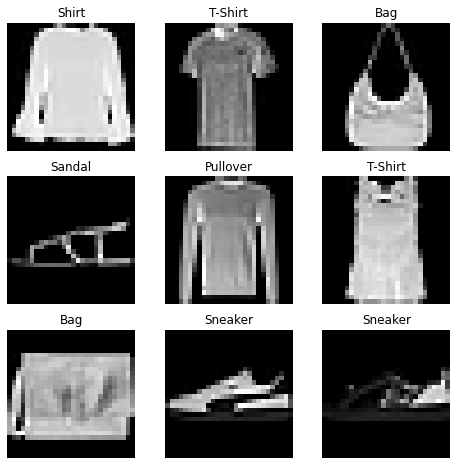

In [37]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Создание собственного набора данных

Ну а теперь к более практическому примеру, который вы сможете взять за основу для каких-то своих задач. Но обращаю ваше внимание на то, что приведенный пример далеко не исчерпывающий. Я бы даже сказала, что он базовый, расширяя его функционал вы сможете создать класс для решения и других нетривиальных задач (не только классификации и регрессии)

#### Dataset

В пользовательском классе мы должны реализовать три функции (обязательно): `__init__`, `__len__`, `__getitem__`

In [38]:
import os
from typing import Tuple, Any

import cv2
import pandas as pd
import torch
import torchvision

In [44]:
class CustomImageDataset(Dataset):
  def __init__(self, path_to_annotation_file: str, transform: Any=None, target_transform: Any=None) -> None:
    self.path_to_annotation_file = path_to_annotation_file
    self.dataset_info = pd.read_csv(path_to_annotation_file, header=None)
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self) -> int:
    return len(self.dataset_info)

  def __getitem__(self, index: int) -> Tuple[torch.tensor, int]:
    path_to_image = self.dataset_info.iloc[index, 0]
    image = cv2.cvtColor(cv2.imread(path_to_image), cv2.COLOR_BGR2RGB)
    label = self.dataset_info.iloc[index, 1]

    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_Transform(label)
      
    return image, label

Давайте инициализируем объект нашего класса. Для демонстрации я создала набор данных, который включает в себя картинки собачек и котиков, для удобства есть файл-аннотация, который содержит в себе пути к файлам и соответствующие классам метки

In [39]:
path_to_dataset = r"/content/drive/MyDrive/PyTorch Lecture/dataset"

df = pd.read_csv(os.path.join(path_to_dataset, "annotation.csv"), header=None, names=['path_to_image', 'label'])
print(df)

                                         path_to_image  label
0    /content/drive/MyDrive/PyTorch Lecture/dataset...      0
1    /content/drive/MyDrive/PyTorch Lecture/dataset...      0
2    /content/drive/MyDrive/PyTorch Lecture/dataset...      0
3    /content/drive/MyDrive/PyTorch Lecture/dataset...      0
4    /content/drive/MyDrive/PyTorch Lecture/dataset...      0
..                                                 ...    ...
995  /content/drive/MyDrive/PyTorch Lecture/dataset...      1
996  /content/drive/MyDrive/PyTorch Lecture/dataset...      1
997  /content/drive/MyDrive/PyTorch Lecture/dataset...      1
998  /content/drive/MyDrive/PyTorch Lecture/dataset...      1
999  /content/drive/MyDrive/PyTorch Lecture/dataset...      1

[1000 rows x 2 columns]


In [40]:
df[df.loc[:, 'label'] == 0]

,path_to_image,label
0,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
1,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
2,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
3,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
4,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
...,...,...
495,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
496,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
497,/content/drive/MyDrive/PyTorch Lecture/dataset...,0
498,/content/drive/MyDrive/PyTorch Lecture/dataset...,0


In [41]:
df[df.loc[:, 'label'] == 1]

,path_to_image,label
500,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
501,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
502,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
503,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
504,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
...,...,...
995,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
996,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
997,/content/drive/MyDrive/PyTorch Lecture/dataset...,1
998,/content/drive/MyDrive/PyTorch Lecture/dataset...,1


А вот собственно создание и инициализация объекта

In [42]:
custom_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Resize((224, 224)), 
                                                    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [45]:
custom_dataset = CustomImageDataset(os.path.join(path_to_dataset, "annotation.csv"), custom_transforms)

In [46]:
len(custom_dataset), custom_dataset[0][0].shape, custom_dataset[0][0].max(), custom_dataset[0][0].min()

(1000, torch.Size([3, 224, 224]), tensor(2.6400), tensor(-1.8597))

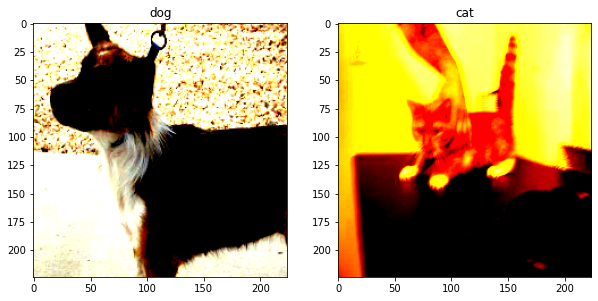

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("dog" if custom_dataset[0][1] == 0 else "cat")
plt.imshow(custom_dataset[0][0].permute(1, 2, 0).numpy()[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.title("dog" if custom_dataset[500][1] == 0 else "cat")
plt.imshow(custom_dataset[500][0].permute(1, 2, 0).numpy()[:, :, ::-1])

Почему же получились такие странные картинки?

Ну, строго говоря, они не странные для алгоритма... Для нас - да. 

А всё потому, что они нормализованные...

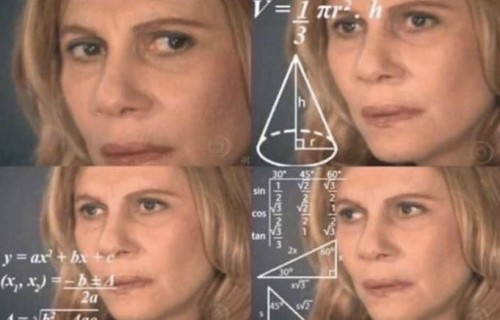

Данные, как правило, приходят в сыром виде, то есть для того, чтобы обучать модель машинного обучения, необходимо выполнить этап предобработки. Функции для предобработки данных содержатся в `torchvision.transforms`. 

На самом деле преобразования над данными полезно выполнять в случае, когда в вашем наборе мало данных. Процедура изменения данных из исходного набора данных назвается аугментацией. Примеры аугментаций: поворот изображения, отражение изображения, наложение шума на изображение (в разумных пределах), кадрирование и т.п.

Давайте посмотрим примеры некоторых аугментаций

#### Отражение изображения по горизонтали

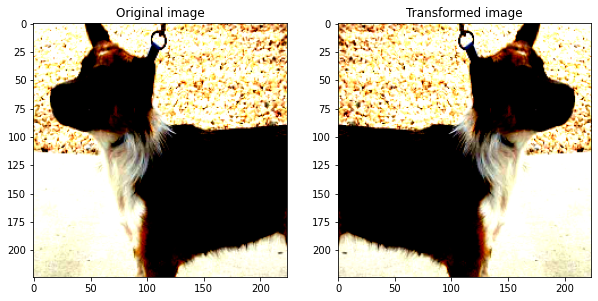

In [48]:
image = custom_dataset[0][0]
transform_image = torchvision.transforms.RandomHorizontalFlip(p=1.0)(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image.permute(1, 2, 0).numpy()[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.title('Transformed image')
plt.imshow(transform_image.permute(1, 2, 0).numpy()[:, :, ::-1])

#### Отражение изображения по вертикали

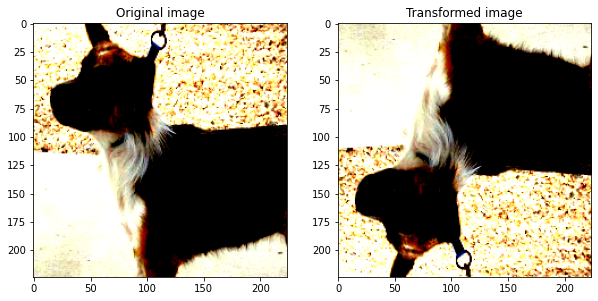

In [49]:
image = custom_dataset[0][0]
transform_image = torchvision.transforms.RandomVerticalFlip(p=1.0)(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image.permute(1, 2, 0).numpy()[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.title('Transformed image')
plt.imshow(transform_image.permute(1, 2, 0).numpy()[:, :, ::-1])

#### Кадрирование относительно центра

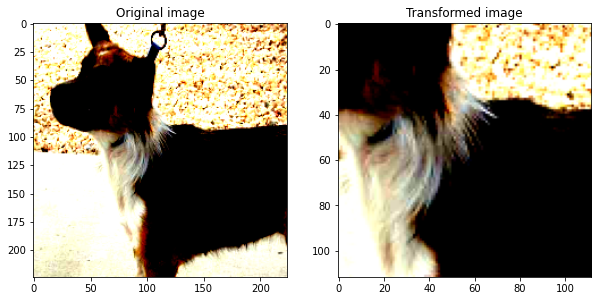

In [50]:
image = custom_dataset[0][0]
transform_image = torchvision.transforms.CenterCrop(112)(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image.permute(1, 2, 0).numpy()[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.title('Transformed image')
plt.imshow(transform_image.permute(1, 2, 0).numpy()[:, :, ::-1])

#### Гауссово размытие

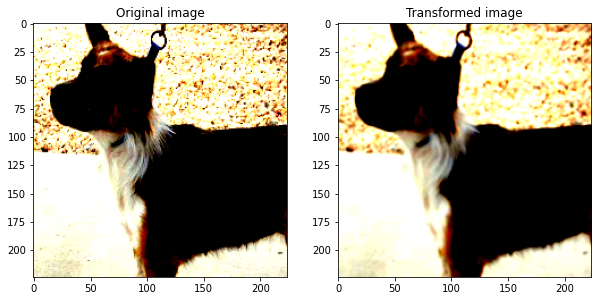

In [51]:
image = custom_dataset[0][0]
transform_image = torchvision.transforms.GaussianBlur(3, (1.0, 3.0))(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(image.permute(1, 2, 0).numpy()[:, :, ::-1])
plt.subplot(1, 2, 2)
plt.title('Transformed image')
plt.imshow(transform_image.permute(1, 2, 0).numpy()[:, :, ::-1])

Ну, принцип вы поняли 😁

Далее сами. Рекомендую не слишком увлекаться аугментациями и формировать их набор разумно. То есть пихать все подряд аугментации не стоит. Стоит проанализировать текущие данные и понять, какие данные потенциально могут приходить на вход вашей модели, но отсутствуют сейчас. Часто приходится добавлять аугментации, связанные с цветовым восприятием картинки. Например, вы собрали набор данных в хороших условиях освещенности (нет засветов и сильных теней), но в реальности мы прекрасно понимаем, что даже в зависимости от погоды освещение может поменяться, что, конечно же, отразится на картинке, а ваша моделька училась на идеальных данных 😢 Вот в таких ситуациях могут помочь аугментации, связанные с изменение яркости и контрастности.

#### DataLoader

Итак, мы с вами реализовали класс-наследник `Dataset`. Раскрою тайну, что этого можно не делать. На самом деле вы могли бы просто прочитать все картинки в список, создать список соответствующих меток, а затем преобразовать эти списки в тензоры (назовем это ленивым вариантом, который будем использовать тогда, когда надо срочно решить задачу). И да, при преобразовании списков в тензоры не забудьте добавить предобработку данных, используя средства `torchvision.transforms`.

Следующий этап - написать модель и цикл обучения, но давайте всё же остановимся на данных и подумаем, как именно мы будем их подавать в модель.

Использование простого цикла `for` для перебора данных - не самый лучший вариант и вот почему:


*   придется что-то думать с перемешиванием данных
*   придется подавать только по одному экземпляру за раз (намного эффективнее передавать данные в модель `батчем` (по сути набор из заданного числа экземпляров данных))
*   подгружать данные параллельно сможем, подключая сторонние пакеты

Ну, если смотреть на каждый пункт изолированно от других, то всё решаемо, но когда мы рассматриваем все пункты одновременно, то могут возникнуть нестыковки. Для того, чтобы исследователь не мучался над оптимальной загрузкой данных (у него и без этого проблем полно), существует `DataLoader`.





In [52]:
from torch.utils.data import DataLoader

In [53]:
dataloader = DataLoader(custom_dataset, batch_size=4, shuffle=True)

0 torch.Size([4, 3, 224, 224])


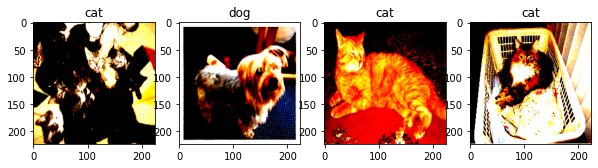

In [54]:
plt.figure(figsize=(10, 5))

for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 1:
      break
      
    print(i_batch, sample_batched[0].shape)

    for j in range(4):
      plt.subplot(1, 4, j + 1)
      plt.title("dog" if sample_batched[1][j] == 0 else "cat")
      plt.imshow(sample_batched[0][j].permute(1, 2, 0).numpy()[:, :, ::-1])

## Конструируем нейросеть

In [55]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Сверточная нейросеть

In [56]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        
        self.conv_1 = nn.Conv2d(3, 16, kernel_size=3, padding=0, stride=2)
        self.conv_2 = nn.Conv2d(16, 32, kernel_size=3, padding=0, stride=2)
        self.conv_3 = nn.Conv2d(32, 64, kernel_size=3, padding=0, stride=2)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.max_pool = nn.MaxPool2d(2)
        
        self.fc_1 = nn.Linear(576, 10) # 43264 - пока что определяем экспериментальным путем (:
        self.fc_2 = nn.Linear(10, 1)
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        output = self.relu(self.conv_1(x))
        output = self.max_pool(output)
        output = self.relu(self.conv_2(output))
        output = self.max_pool(output)
        output = self.relu(self.conv_3(output))
        output = self.max_pool(output)

        # print(torch.nn.Flatten()(output).shape) - определить можно, распечатав вот это

        output = torch.nn.Flatten()(output)
        output = self.relu(self.fc_1(output))
        output = torch.nn.Sigmoid()(self.fc_2(output))
        return output

Альтернативная реализация

In [159]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=0, stride=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=0, stride=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=0, stride=2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
            
        self.fc1 = nn.Linear(576, 10)
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = torch.nn.Flatten()(output)
        output = self.relu(self.fc1(output))
        output = self.fc2(output)
        return torch.nn.Sigmoid()(output)

### Полносвязная нейросеть

А вот это смотрите на сайтике https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html 🤓

## Train Loop

In [321]:
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [322]:
path_to_folder = r"/content/drive/MyDrive/PyTorch Lecture/dataset"
path_to_train_annotation = os.path.join(path_to_folder, "train_annotation.csv")
path_to_test_annotation = os.path.join(path_to_folder, "test_annotation.csv")

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = CNN().to(device)

In [ ]:
torch.cuda.is_available()

Объявляем `Dataset` и `DataLoader`

In [324]:
custom_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Resize((224, 224)), 
                                                    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [ ]:
train_dataset = CustomImageDataset(path_to_train_annotation, custom_transforms)
test_dataset = CustomImageDataset(path_to_test_annotation, custom_transforms)

print(len(train_dataset), len(test_dataset))

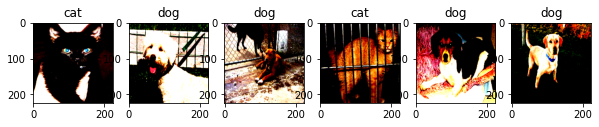

In [326]:
import random
plt.figure(figsize=(10, 5))

for j in range(6):
  index = random.randint(0, 800)
  plt.subplot(1, 6, j + 1)
  plt.title("dog" if train_dataset[index][1] == 0 else "cat")
  plt.imshow(train_dataset[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])

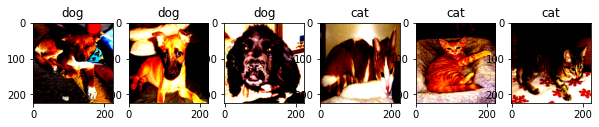

In [327]:
import random
plt.figure(figsize=(10, 5))

for j in range(6):
  index = random.randint(0, 200)
  plt.subplot(1, 6, j + 1)
  plt.title("dog" if test_dataset[index][1] == 0 else "cat")
  plt.imshow(test_dataset[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])

In [328]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

А теперь объявим оптимизатор и критерий

Оптимизаторы определяют оптимальный набор параметров модели, таких как вес и смещение, чтобы при решении конкретной задачи модель выдавала наилучшие результаты.

Самой распространённой техникой оптимизации, используемой большинством нейронных сетей, является алгоритм градиентного спуска.

Большинство популярных библиотек глубокого обучения, например PyTorch и Keras, имеют множество встроенных оптимизаторов, базирующихся на использовании алгоритма градиентного спуска, например SGD, Adadelta, Adagrad, RMSProp, Adam и пр.

Под критерием будем понимать метрику, которая сравнивает выходное значение модели с истинным значением. На основе полученнного значения вычисляются градиенты, за счет которых производится корректировка весов и смещений модели.

In [329]:
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [ ]:
epochs = 20

model.train()

accuracy_values = []
loss_values = []

for epoch in range(epochs):

    epoch_loss = 0
    epoch_accuracy = 0
    
    for data, label in train_dataloader:
        data = data.to(device)
        label = label.to(device)
 
        output = model(data)
        loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
        epoch_accuracy += acc / len(train_dataloader)
        epoch_loss += loss / len(train_dataloader)

    accuracy_values.append(epoch_accuracy)
    loss_values.append(epoch_loss)
        
    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch + 1, epoch_accuracy, epoch_loss))

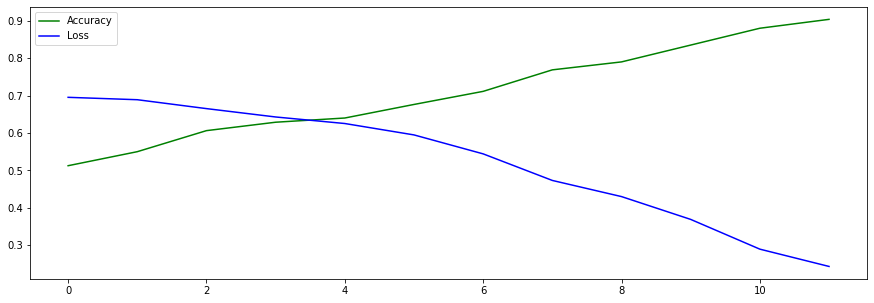

In [332]:
plt.figure(figsize=(15, 5))
plt.plot(range(12), accuracy_values, color="green")
plt.plot(range(12), [float(value.detach()) for value in loss_values], color="blue")
plt.legend(["Accuracy", "Loss"])

In [333]:
model.eval()

test_loss = 0
test_accuracy = 0
    
for data, label in test_dataloader:
    data = data.to(device)
    label = label.to(device)

    output = model(data)
    
    acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
    test_accuracy += acc / len(test_dataloader)
    test_loss += float(loss.detach()) / len(test_dataloader)

Получим значение точности и функции потерь на тестовой выборке

In [334]:
test_accuracy, test_loss

(0.6900000000000004, 0.03322268649935725)

А вот и наглядный пример того, для чего нужна тестовая выборка.

Казалось бы, наша модель прекрасно работает, но нет, и этому есть несколько объяснений:


*   модели не хватило эпох обучения
*   модели не хватило данных и она начала запоминать данные для обучения



В процессе обучения очень полезно использовать валидационную выборку. Это такая выборка, данные из которой напрямую не участвуют в обучении, но после каждой эпохи эти данные пропускаются через модель для того, чтобы оценить качество работы модели и проверить, не переобучается ли модель на данных для обучения.

## Сохранение и загрузка модели

Сохранение модели

In [335]:
torch.save(model.state_dict(), os.path.join("/content/drive/MyDrive/PyTorch Lecture/dataset", "weight.pt"))

In [ ]:
model = CNN()
model.load_state_dict(torch.load(os.path.join("/content/drive/MyDrive/PyTorch Lecture/dataset", "weight.pt")))

In [337]:
model.eval()

test_loss = 0
test_accuracy = 0
    
for data, label in test_dataloader:
    data = data.to(device)
    label = label.to(device)

    output = model(data)
    
    acc = np.array(([1 if (1 if output[j][0].detach() >= 0.5 else 0) == int(label[j]) else 0 for j in range(4)])).mean()
    test_accuracy += acc / len(test_dataloader)
    test_loss += float(loss.detach()) / len(test_dataloader)

In [338]:
test_accuracy, test_loss

(0.6900000000000004, 0.03322268649935725)

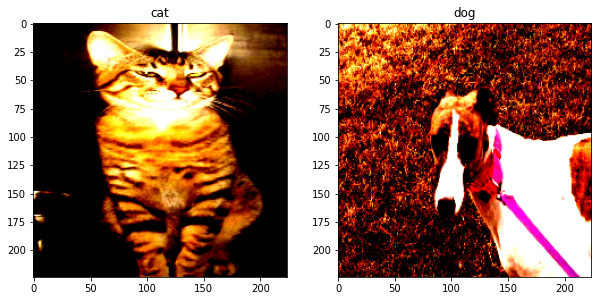

In [360]:
import random
plt.figure(figsize=(10, 5))

for j in range(2):
  index = random.randint(0, 200)
  plt.subplot(1, 2, j + 1)
  plt.title("dog" if (1 if  model(test_dataset[index][0].unsqueeze(dim=0))[0] >= 0.5 else 0) == 0 else "cat")
  plt.imshow(test_dataset[index][0].permute(1, 2, 0).numpy()[:, :, ::-1])